In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.07524596],
       [2.95466511]])

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.linear_model  import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07524596]), array([[2.95466511]]))

In [5]:
lin_reg.predict(np.array([[0], [2]]))

array([[4.07524596],
       [9.98457617]])

In [6]:
m = 100
X = -3 + 6 * np.random.rand(m, 1)
y = 0.5 * X**2 + 2 * X + 2 + np.random.randn(m, 1)

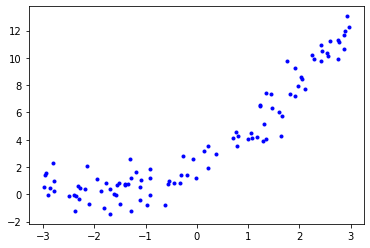

In [7]:
plt.plot(X, y, "b.")

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [9]:
X_poly[0]

array([ 1.97629298,  3.90573393,  7.71887455, 15.25475756])

In [10]:
X[0]

array([1.97629298])

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02449601]),
 array([[ 2.06632448,  0.57047672, -0.01704832, -0.00652298]]))

In [12]:
y_fourth_degree = lin_reg.coef_[0][3] * X**4 + lin_reg.coef_[0][2] * X**3 + lin_reg.coef_[0][1] * X**2 + lin_reg.coef_[0][0] * X + lin_reg.intercept_[0]

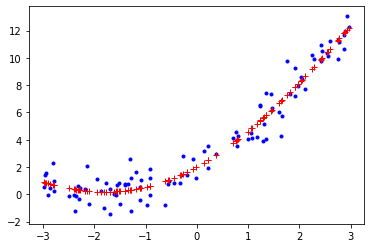

In [13]:
plt.plot(X, y, "b.")
plt.plot(X, y_fourth_degree, "r+")


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learnin_curves(model, X, y):
    X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size=0.2)
    train_errors = []
    cross_errors = []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_cross_pred = model.predict(X_cross)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        cross_errors.append(mean_squared_error(y_cross, y_cross_pred))
        
    plt.plot(np.sqrt(train_errors), "b-+", label="training set")
    plt.plot(np.sqrt(cross_errors), "r-", label="crossval set")
    plt.legend()
    plt.ylim(top=4)
    plt.ylim(bottom=0)
    

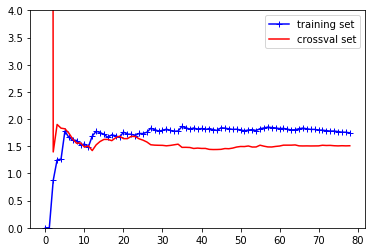

In [15]:
lin_reg = LinearRegression()
plot_learnin_curves(lin_reg, X, y)

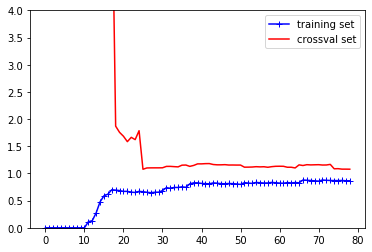

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias=False)),
    ("linear_regression", LinearRegression())
])

plot_learnin_curves(polynomial_regression, X, y)

In [17]:
y.shape

(100, 1)

In [18]:
y.ravel().shape

(100,)

In [19]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [33]:
# --- Excercise

In [35]:
X = iris["data"][:, 2:4]
y = iris["target"]

In [44]:
X_with_bias = np.c_[np.ones([len(X),1]), X]

In [45]:
np.random.seed(2042)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2)

In [56]:
y_train.shape

(120,)

In [75]:
def to_one_hot(y):
    n = y.max() + 1
    m = len(y)
    one_hot = np.zeros([m, n])
    one_hot[np.arange(m), y] = 1
    
    return one_hot

In [77]:
y_train[:5]

array([2, 0, 2, 1, 1])

In [78]:
to_one_hot(y_train[:5])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [79]:
y_train_hot_one = to_one_hot(y_train)
y_test_hot_one = to_one_hot(y_test)

In [80]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [94]:
softmax([[1, 10], [2, 3], [3, 3]])

array([[1.23394576e-04, 9.99876605e-01],
       [2.68941421e-01, 7.31058579e-01],
       [5.00000000e-01, 5.00000000e-01]])

In [101]:
X_train

array([[1. , 6.9, 2.3],
       [1. , 1.4, 0.3],
       [1. , 5.6, 2.1],
       [1. , 4.5, 1.5],
       [1. , 3.9, 1.4],
       [1. , 6.7, 2. ],
       [1. , 4.5, 1.5],
       [1. , 1.9, 0.4],
       [1. , 1.6, 0.2],
       [1. , 4.5, 1.5],
       [1. , 6. , 1.8],
       [1. , 5.7, 2.1],
       [1. , 5.6, 2.4],
       [1. , 5.6, 1.4],
       [1. , 1.7, 0.4],
       [1. , 5.1, 2. ],
       [1. , 1.3, 0.3],
       [1. , 6. , 2.5],
       [1. , 5.1, 2.4],
       [1. , 5.1, 1.5],
       [1. , 4.8, 1.8],
       [1. , 1.3, 0.2],
       [1. , 1.3, 0.2],
       [1. , 4. , 1.2],
       [1. , 4.2, 1.3],
       [1. , 6.6, 2.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 4.7, 1.4],
       [1. , 1.5, 0.1],
       [1. , 4.9, 2. ],
       [1. , 1.3, 0.3],
       [1. , 3.5, 1. ],
       [1. , 4. , 1.3],
       [1. , 5.5, 2.1],
       [1. , 5.7, 2.3],
       [1. , 5.6, 2.2],
       [1. , 1.5, 0.2],
       [1. , 1.7, 0.3],
       [1. , 1.6, 0.2],
       [1. , 5.1, 1.9],
       [1. , 4.5

In [111]:
np.sum([[1, 1], [2, 2], [3,3]], axis=1, keepdims=1)

array([[2],
       [4],
       [6]])

In [113]:
n_inputs = X_train.shape[1]
n_outputs = y_train_hot_one.shape[1]

In [114]:
n_inputs, n_outputs

(3, 3)

In [412]:
eta = 0.1 # --- learning_rate very important to hit "early_stop" threshold
n_iterations = 50001
m = len(X_train)
epsilon = 1e-7
best_loss = np.infty
early_stop = False
alpha = 0.1 # --- normalization hyperparameter
            # --- w/o normalization _early_stop_ doesn't work

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    gradient = 1/m * X_train.T.dot(y_proba - y_train_hot_one)  + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta -= eta * gradient
    
    logits = X_test.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss  = -np.mean(np.sum(y_test_hot_one * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss

    if(loss < best_loss):
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss)
        early_stop = True
        break
        
if(early_stop == True):
    print ("early_stop")
else:
    print ("no early stop")

31095 0.5455671374654211
31096 0.5455671374654211
early_stop


In [263]:
Theta

array([[ 8.62100747,  1.41153837, -8.35300831],
       [-1.47786234,  0.45241553,  0.75904357],
       [-3.38177535, -0.17263263,  4.99183264]])

In [138]:
X_train.dot(Theta).shape

(120, 3)

In [140]:
y_train_hot_one.shape

(120, 3)

In [142]:
X_train.shape

(120, 3)

In [155]:
logits=X_test.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.8666666666666667

In [156]:
y_predict

array([0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       1, 2, 0, 0, 0, 2, 0, 1], dtype=int64)

In [157]:
y_test

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 2, 0, 1])

In [158]:
Theta

array([[ 3.75358641, -0.12394942, -2.28810483],
       [-0.16950496,  0.86631672,  0.60267709],
       [-1.38134155,  0.13086811,  2.44342771]])

In [165]:
Theta[ 1:]

array([[-0.16950496,  0.86631672,  0.60267709],
       [-1.38134155,  0.13086811,  2.44342771]])

In [411]:
eta = 0.1 
n_iterations = 500001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    #xentropy_loss = -np.mean(np.sum(y_train_hot_one * np.log(Y_proba + epsilon), axis=1))
    #l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    #loss = xentropy_loss + alpha * l2_loss
    gradients = 1/m * X_train.T.dot(Y_proba - y_train_hot_one) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_test.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_test_hot_one * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 100000 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 6.51409748416798
30906 0.545567137465418
30907 0.545567137465418 early stopping!


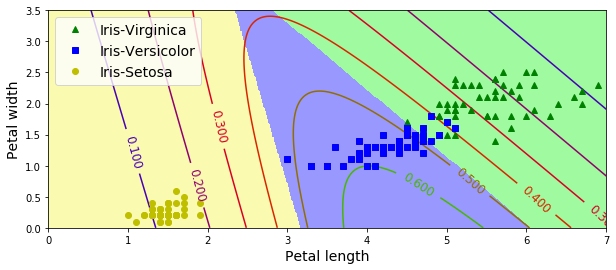

In [413]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [374]:
Y_proba.shape

(100000, 3)

In [349]:
x0.ravel()

array([0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
       8.        ])

In [385]:
np.random.rand(2, 2).ravel().reshape(2, 2)

array([[0.57037711, 0.0168556 ],
       [0.07195549, 0.52965151]])

In [389]:
x0

array([[0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       ...,
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ]])

In [395]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [398]:
X_new_with_bias

array([[1.        , 0.        , 0.        ],
       [1.        , 0.01603206, 0.        ],
       [1.        , 0.03206413, 0.        ],
       ...,
       [1.        , 7.96793587, 3.5       ],
       [1.        , 7.98396794, 3.5       ],
       [1.        , 8.        , 3.5       ]])

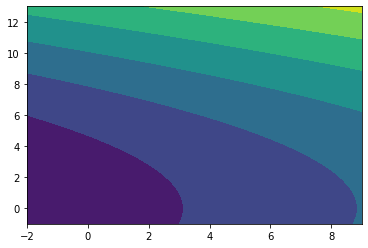

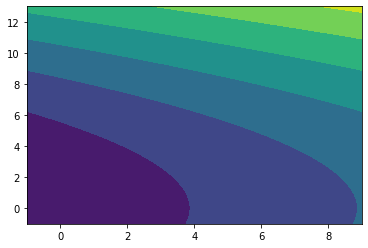

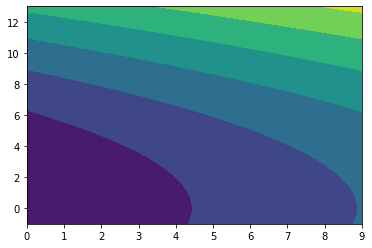

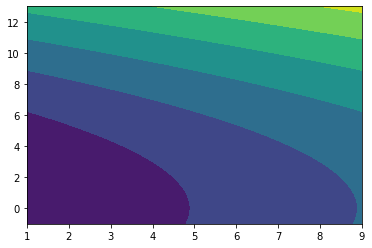

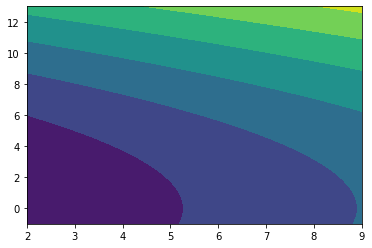

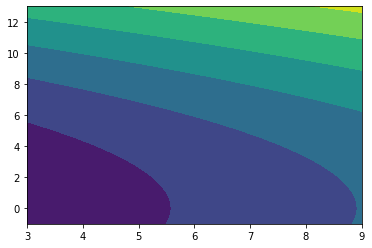

In [461]:
for i in range(-1, 5):
    f1 = np.linspace(-1 + i, 9, 2).reshape(-1, 1)
    f2 = np.linspace(-1, 13, 60).reshape(-1, 1)
    m1, m2 = np.meshgrid(f1, f2)
    n1 = m1.ravel()
    n2 = m2.ravel()

    #print(f1)
    #print(f2)
    #print(m1.ravel())
    #print(m2.ravel())
    oo = (n1**2 + n2**2).reshape(m1.shape)
    #print("oo = ", oo)

    plt.contourf(m1, m2, oo)
    plt.show()


In [459]:
range(-1, 5, 1)

range(-1, 5)